In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla


<img src="task 11.png">

$$
{\large-\frac{1}{2}\psi''+\frac{1}{2}x^2\psi-E\psi=0\ \Rightarrow\ } oscillator
$$

Analytic solution:

$$
{\large E_n=\hbar\omega(n+\frac{1}{2})} \\
{\large \psi_n(x)=\frac{1}{\sqrt{2^nn!}} \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} \exp\left(\frac{-m\omega x^2}{2\hbar}\right) H_n\left(\sqrt{\frac{m\omega}{\hbar}} x\right)}
$$

Let's take
$$
\large \hbar=m=\omega=1
$$

$$
\Rightarrow\ E_0=\frac{1}{2};\ \psi_0(x)=\left(\frac{1}{\pi}\right)^{\frac{1}{4}} \exp\left(-\frac{x^2}{2}\right)
$$

Numerically:

$$
\large
\psi'' \approx \frac{\psi_{i-1}-2\psi_i+\psi_{i+1}}{h^2}
$$

Substituting into the equation:

$$
{\large -\frac{1}{2h^2}\psi_{i-1}+(\frac{1}{h^2}+U_i)\psi_i-\frac{1}{2h^2}\psi_{i+1}=E\psi_i}
$$

Let:

$$
\large \rho = \frac{1}{h^2} \\ 
\ \\
\\
\Rightarrow -\frac{\rho}{2}\psi_{i-1}+(\rho+U_i)\psi_i-\frac{\rho}{2}\psi_{i+1}=E\psi_i
$$

So, we have system of equations:


$$
\large\left (\begin{matrix}
 \rho+U_0 & 1 & 0 & 0 & \dots & 0 & 0 & 0 \\
 -\frac{1}{2h^2} & \rho+U_1 & -\frac{1}{2h^2} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{1}{2h^2} & \rho+U_2 & -\frac{1}{2h^2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & -\frac{1}{2h^2} & \rho+U_{n-1} & -\frac{1}{2h^2} \\
 0 & 0 & 0 & 0 & \dots & 0 & -\frac{1}{2h^2} & \rho+U_n
\end{matrix}\right ) * \left(\begin{matrix} \psi_0 \\ \psi_1 \\ \psi_2 \\ \vdots \\ \psi_{n-1} \\ \psi_n \end{matrix}\right)
=
\left(\begin{matrix}
\psi_1 \\
\psi_2 \\
\psi_3 \\
\vdots \\
\psi_{n-1}\\
\psi_n
\end{matrix}\right)
= H\overline{\psi}
$$

Let's renumber in descending order eigenvalues and take random vector as zero approximation, rewriting it using eigenvectors:
$$
|\lambda_1|>|\lambda_2|\ge|\lambda_3|\ge\dots\ge|\lambda_n| \\
\ \\
\\
\psi^0 = a_1\psi_1 + a_2\psi_2+\dots
$$

$$
\forall \psi_j:\ H\psi_j = \lambda_j \psi_j
$$

Let's make iterations like:
$$
\psi^{[i]}=H\psi^{[i-1]}
$$

$$
\psi_i = \sum_{j=1}^{n}a_j\lambda_j^i\psi_j=\lambda_1^i\left(a_1\psi_1 + 
\sum_{j=2}^{n}a_j\left(\frac{\lambda_j}{\lambda_1}\right)^i \psi_j\right)
$$

$$
\lim_{i \to \inf} \left( \frac{\lambda_j}{\lambda_1} \right)^i = 0 \\
\ \\
\\
\Rightarrow\ \psi^i = H\cdot\psi^{[i-1]} \approx \lambda_1\psi^{[i-1]} \\
\ \\
\\
\Rightarrow \lambda_1^{(i)} = \frac{\psi_n^{[i]}}{\psi_n^{[i-1]}}\ \forall n
$$

Or:
$$
\lambda_1^{(i)} = {\frac{||\psi^{[i]}||}{||\psi^{[i-1]}||}}=\lambda_{max}
$$

But we need $\lambda_{min}$. So we need:

$$
{\large \widetilde{\lambda}_{max} = \frac{1}{\lambda_{min}}\ for\ \widetilde{H}=H^{-1}}
$$

Iterations:
$$
{H^{-1}\psi^{[i-1]}=\psi^{[i]}} \\
$$

Or:
$$
{\large \psi^{[i-1]}=H\cdot\psi^{[i]}}
$$

So, we need to do k iterations like:

$$
{\large H\cdot\psi^{[i]}=\psi^{[i-1]}}\ \rightarrow\ \lambda_{max}\psi^{[i]}
$$

Here $\psi^{[i]}$ is not normed and contains $\widetilde{\lambda}_{max}$.
But $\psi^{[i-1]}$ have to be normed.

$$
{\large E_0 \approx \lambda_{min} = \frac{||\psi^{[i-1]}||}{||\psi^{[i]}||} }
$$

In [5]:
L = 5  #  Lets think that |psi(+-L)| = 0

N = 2000    # Number of steps along x
M = 20      # Number of iterations
h = 2*L/N
r = 1/h**2

U = lambda x: pow(x, 2)/2

In [6]:
x = np.linspace(-L, L, N + 1) # x values
u = U(x)                      # u values

In [7]:
solution = lambda x: pow(np.pi, -1 / 4) * np.exp(- pow(x, 2) / 2)

u_sol = solution(x)
u_sol /= sla.norm(u_sol)
E_sol = 0.5

In [69]:
def TridiagonalMatrix(d):
    a = [0] + [-r/2 for _ in range(N)]
    b = [u[i] + r for i in range(N + 1)]
    c = [-r/2 for _ in range(N)] + [0]
    d = d.copy()
    
    for i in range(1, N + 1):
        xi = a[i] / b[i - 1]
        b[i] -= xi * c[i - 1]
        d[i] -= xi * d[i - 1]
    y = np.zeros(N + 1)
    y[-1] = d[-1] / b[-1]
    for i in range(N - 1, -1, -1):
        y[i] = (d[i] - c[i] * y[i + 1]) / b[i]
    return y

In [72]:
def ReversedIters(iters):
    start = np.ones(N+1)
    start[0] = 0
    start[-1] = 0

    Psi = start
    E = 0

    for i in range(iters):
        prev_Psi = Psi/sla.norm(Psi)
        Psi = TridiagonalMatrix(prev_Psi)

    return Psi/sla.norm(Psi), abs(Psi - prev_Psi), sla.norm(prev_Psi)/sla.norm(Psi)


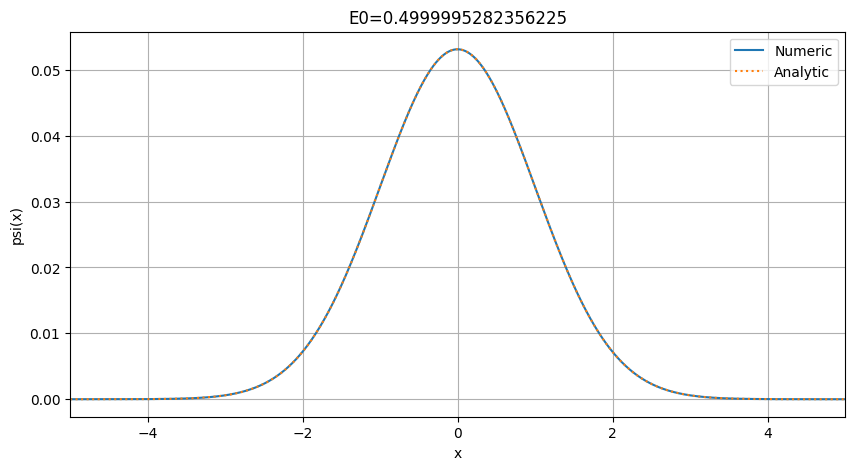

In [73]:
psi, delta, E = ReversedIters(5)


plt.figure(figsize=(10,5))
plt.plot(x, psi, label='Numeric')
plt.plot(x, u_sol, label='Analytic', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.grid()
plt.xlim([-5,5])
plt.legend()
plt.title('E0='+str(E)) # +', error='+str(delta)
plt.show()